<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

[Prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično odvajanje</b></font>
<img src="">
<font size="2">September 2020</font>
</center>

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></span></li><li><span><a href="#Aproksimacija-prvega-odvoda-po-metodi-končnih-razlik" data-toc-modified-id="Aproksimacija-prvega-odvoda-po-metodi-končnih-razlik-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aproksimacija prvega odvoda po metodi končnih razlik</a></span></li><li><span><a href="#Centralna-diferenčna-shema" data-toc-modified-id="Centralna-diferenčna-shema-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Centralna diferenčna shema</a></span><ul class="toc-item"><li><span><a href="#Odvod-$f'(x)$" data-toc-modified-id="Odvod-$f'(x)$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Odvod $f'(x)$</a></span></li><li><span><a href="#Zgled:-$\exp(-x)$" data-toc-modified-id="Zgled:-$\exp(-x)$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Zgled: $\exp(-x)$</a></span></li><li><span><a href="#Odvod-$f''(x)$" data-toc-modified-id="Odvod-$f''(x)$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Odvod $f''(x)$</a></span></li><li><span><a href="#Odvod-$f'''(x)$" data-toc-modified-id="Odvod-$f'''(x)$-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Odvod $f'''(x)$</a></span></li><li><span><a href="#Odvod-$f^{(4)}(x)$" data-toc-modified-id="Odvod-$f^{(4)}(x)$-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Odvod $f^{(4)}(x)$</a></span></li><li><span><a href="#Povzetek-centralne-diferenčne-sheme*" data-toc-modified-id="Povzetek-centralne-diferenčne-sheme*-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Povzetek centralne diferenčne sheme*</a></span></li><li><span><a href="#Uporaba-scipy.misc.central_diff_weight" data-toc-modified-id="Uporaba-scipy.misc.central_diff_weight-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Uporaba <code>scipy.misc.central_diff_weight</code></a></span></li><li><span><a href="#Izboljšan-približek---Richardsonova-ekstrapolacija" data-toc-modified-id="Izboljšan-približek---Richardsonova-ekstrapolacija-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Izboljšan približek - Richardsonova ekstrapolacija</a></span><ul class="toc-item"><li><span><a href="#Zgled" data-toc-modified-id="Zgled-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>Zgled</a></span></li></ul></li></ul></li><li><span><a href="#Necentralna-diferenčna-shema" data-toc-modified-id="Necentralna-diferenčna-shema-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Necentralna diferenčna shema</a></span><ul class="toc-item"><li><span><a href="#Diferenčna-shema-naprej" data-toc-modified-id="Diferenčna-shema-naprej-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Diferenčna shema naprej</a></span></li><li><span><a href="#Diferenčna-shema-nazaj" data-toc-modified-id="Diferenčna-shema-nazaj-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Diferenčna shema nazaj</a></span></li></ul></li><li><span><a href="#Uporaba-numpy.gradient" data-toc-modified-id="Uporaba-numpy.gradient-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Uporaba <code>numpy.gradient</code></a></span><ul class="toc-item"><li><span><a href="#Zgled" data-toc-modified-id="Zgled-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Zgled</a></span></li></ul></li><li><span><a href="#Zaokrožitvena-napaka-pri-numeričnem-odvajanju" data-toc-modified-id="Zaokrožitvena-napaka-pri-numeričnem-odvajanju-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Zaokrožitvena napaka pri numeričnem odvajanju</a></span><ul class="toc-item"><li><span><a href="#Zgled" data-toc-modified-id="Zgled-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Zgled</a></span></li></ul></li><li><span><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></span></li><li><span><a href="#Dodatno" data-toc-modified-id="Dodatno-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dodatno</a></span></li></ul></div>

# Uvod

Vsako elementarno funkcijo lahko analitično odvajamo. Definicija odvoda je:
$$f'(x)=\lim_{\Delta x \rightarrow 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}.$$

Neposredna uporaba zgornje enačbe vodi v odštevanje zelo podobnih funkcijskih vrednostih ($f(x+\Delta x)$, $f(x)$), obremenjenih z zaokrožitveno napako, ki jih delimo z majhno vrednostjo $\Delta x$; posledično ima odvod bistveno manj signifikantnih števk kakor pa funkcijske vrednosti. Numeričnemu odvajanju se izognemo, če imamo to možnost; je pa v nekaterih primerih (npr. reševanje diferencialnih enačb) nepogrešljivo orodje!

Pri numeričnem odvajanju imamo dva, v principu različna, pristopa:

1. najprej izvedemo **interpolacijo/aproksimacijo**, nato pa na podlagi znanih interpolacijskih/aproksimacijskih funkcij izračunamo odvod (o tej temi smo že govorili pri interpolaciji oz. aproksimaciji) in 
2. računanje odvoda **neposredno iz vrednosti iz tabele**.

V okviru tega poglavja se bomo seznanili s tem, kako numerično izračunamo odvod funkcije $f(x)$; pri tem so vrednosti funkcije $f(x)$ podane tabelarično (pari $x_i$, $y_i$), kakor je prikazano na sliki:
<img src='./fig/odvajanje_tabela.png' width=400>
Najprej se bomo osredotočili na ekvidistantno, s korakom $h$, razporejene vrednosti $x_i$; vrednosti funkcije pa bodo $y_i=f(x_i)$.

Glede na zgornjo definicijo odvoda, bi prvi odvod (za mesto $i$) lahko zapisali:
$$y_i'=\frac{y_{i+1}-y_{i}}{h},$$
kjer je $h=x_{i+1}-x_{i}$. S preoblikovanjem enačbe:
$$y_i'=-\frac{y_{i}}{h}+\frac{y_{i+1}}{h},$$
lahko tudi rečemo, da za prvi odvod funkcije na mestu $i$, **utežimo** funkcijsko vrednost pri $i$ z $-1/h$ in funkcijsko vrednost pri $i+1$ z $+1/h$.

V nadaljevanju si bomo pogledali teoretično ozadje kako določimo ustrezne **uteži** za različne stopnje odvodov, katere možnosti pri tem imamo in kako to vpliva na red natančnosti.

# Aproksimacija prvega odvoda po metodi končnih razlik

Odvod $f'(x)$ lahko aproksimiramo na podlagi razvoja Taylorjeve vrste. To metodo imenujemo **metoda končnih razlik** ali tudi **diferenčna metoda**.

Razvijmo **Taylorjevo vrsto naprej** (naprej, zaradi člena $+h$):
$$f{\left (x + h \right )} =\sum_{n=0}^{\infty}\frac{h^n}{n!}\frac{d^n}{dx^n}f(x)= f{\left (x \right )} + h\, f'\left (x \right ) + \underbrace{\frac{h^2}{2}\,f''(x)+\cdots}_{\mathcal{O}\left(h^{2}\right)}$$


Člen $\mathcal{O}\left(h^{2}\right)$ označuje napako drugega reda. Če iz enačbe izrazimo prvi odvod:

$$f'{\left (x \right )}=\frac{1}{h}\left(f{\left (x + h \right )} - f{\left (x \right )}\right) - \underbrace{\frac{h}{2}\,f''(x)+\cdots}_{\mathcal{O}\left(h^{1}\right)}$$

Ugotovimo, da lahko ocenimo prvi odvod v točki $x_i$ (to je: $f_o'(x_i)$) na podlagi dveh zaporednih funkcijskih vrednosti:
$$f_o'(x_i)=\frac{1}{h}\left(y_{i+1}-y_i\right)$$
in pri tem naredimo **napako metode**, ki je prvega reda $\mathcal{O}\left(h^{1}\right)$. 

Uporabili smo $y_i=f(x_i)$ (glejte sliko zgoraj).

Napaka je:

$$e=-\frac{h}{2}\,f''(\xi),$$

kjer je $\xi$ neznana vrednost na intervalu $[x_i, x_{i+1}]$ in smo zanemarili višje člene.

Velja torej izraz:
$$f'(x_i)=f_o'(x_i)+e$$

Sedaj si poglejmo, kako pridemo do istega rezultata s strojno izpeljavo; najprej uvozimo ``sympy``:

In [1]:
import sympy as sym
sym.init_printing()

Definirajmo simbole:

In [2]:
f = sym.Function('f')
x, h = sym.symbols('x, h')

Nato nadaljujemo z razvojem **Taylorjeve vrste naprej** (angl. *forward Taylor series*):

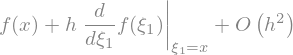

In [3]:
f(x+h).series(h, n=2)

Člen $\mathcal{O}\left(h^{2}\right)$ vsebuje člene drugega in višjega reda. V zgornji enačbi je uporabljena začasna spremenljivko za odvajanje $\xi_1$; izvedmo odvajanje in vstavimo $\xi_1=x$:

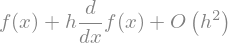

In [4]:
f(x+h).series(h, n=2).doit()

Zapišemo enačbo:

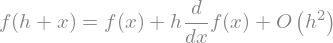

In [5]:
enačba = sym.Eq(f(x+h), f(x+h).series(h, n=2).doit())
enačba

Rešimo jo za prvi odvod $f'(x)$:

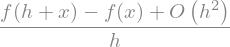

In [6]:
f1_naprej_točno = sym.solve(enačba, f(x).diff(x))[0]
f1_naprej_točno

V kolikor odvoda drugega in višjih redov ne upoštevamo, smo naredili torej napako:

In [7]:
f1_naprej_O = f1_naprej_točno.expand().getO()
f1_naprej_O

Napaka $\mathcal{O}\left(h^{1}\right)$ je torej prvega reda in če ta člen zanemarimo, naredimo *napako metode* in dobimo oceno odvoda:

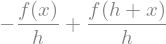

In [8]:
f1_naprej_ocena = f1_naprej_točno.expand().removeO()
f1_naprej_ocena

Ugotovimo, da gre za isti izraz, kakor smo ga izpeljali zgoraj, torej je:

$$y_i'=\frac{1}{h}\left(-y_i+y_{i+1}\right).$$

Uteži torej so:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   | $y_{i}$   |$y_{i+1}$|
|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{h}\cdot$| -1 | 1 |

# Centralna diferenčna shema

## Odvod $f'(x)$

Najprej si poglejmo razvoj **Taylorjeve vrste nazaj** (angl. *backward Taylor series*):

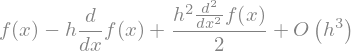

In [9]:
f(x-h).series(h, n=3).doit()

Ugotovimo, da se pri razliki vrste naprej in nazaj odštevajo členi sodega reda; definirajmo:

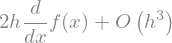

In [10]:
def razlika(n=3):
    return f(x+h).series(h, n=n).doit()-f(x-h).series(h, n=n).doit()
razlika(n=3)

Izvedemo sledeče korake:

1. Taylorjevo vrsto nazaj odštejemo od vrste naprej, sodi odvodi se odštejejo,
2. rešimo enačbo za prvi odvod,
3. določimo napako metode,
4. določimo oceno odvoda.

Izvedimo zgornje korake:

In [11]:
f1_cent_točno = sym.solve(
           sym.Eq(f(x+h) - f(x-h), razlika(n=3)), # 1 korak
           f(x).diff(x))[0]                       # 2.korak
f1_cent_O = f1_cent_točno.expand().getO()         # 3.korak
f1_cent_ocena = f1_cent_točno.expand().removeO()  # 4.korak

Ocena 1. odvoda torej je:

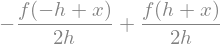

In [12]:
f1_cent_ocena

Ali:

$$y_i'=\frac{1}{2h}\left(-y_{i-1}+y_{i+1}\right)$$

Uteži torej so:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-1}$ | $y_{i}$   |$y_{i+1}$|
|:--------:|:-------------------:|:----------:|:----------:|
|$y_i'=\frac{1}{2h}\cdot$| -1 | 0 | 1 |

Napaka metode pa je torej drugega reda:

In [13]:
f1_cent_O

## Zgled: $\exp(-x)$

Poglejmo si zgled eksponentne funkcije $f(x)=\exp(-x)$ in za točko $x=1,0$ izračunajmo prvi odvod $f'(x)=-\exp(-x)$ pri koraku $h_0=1$ in $h_1=0,1$. 

Najprej pripravimo tabelo numeričnih vrednosti in točen rezultat:

In [14]:
import numpy as np
x0 = np.array([0., 1., 2.]) # korak h=1
y0 = np.exp(-x0)
h0 = x0[1]-x0[0]

x1 = np.array([0.9, 1.0, 1.1]) # korak h=0.1
y1 = np.exp(-x1)
h1 = x1[1]-x1[0]

f1_točno0 = - np.exp(-1) # točen rezultat
f1_točno1 = - np.exp(-1) # točen rezultat

Potem uporabimo shemo naprej:

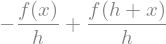

In [15]:
f1_naprej_ocena # da se spomnimo

In [16]:
f1_naprej0 = (y0[1:]-y0[:-1])/h0   # korak h_0
f1_naprej1 = (y1[1:]-y1[:-1])/h1   # korak h_1

Izračunajmo napako pri $x=1,0$:

In [17]:
f1_točno0 - f1_naprej0[1]

In [18]:
f1_točno1 - f1_naprej1[1] # korak h1

Potrdimo lahko, da je napaka pri koraku $h/10$ res približno 1/10 tiste pri koraku $h$.

Poglejmo sedaj še napako za centralno diferenčno shemo, ki je drugega reda:

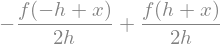

In [19]:
f1_cent_ocena

In [20]:
f1_cent0 = (y0[2:]-y0[:-2])/(2*h0) # korak h_0
f1_cent1 = (y1[2:]-y1[:-2])/(2*h1) # korak h_1

Analizirajmo napako:

In [21]:
f1_točno0 - f1_cent0[0] # korak h0

In [22]:
f1_točno1 - f1_cent1[0] # korak h1

Potrdimo lahko, da je napaka pri koraku $h/10$ res približno 1/100 tiste pri koraku $h$.

## Odvod $f''(x)$

Če Taylorjevo vrsto naprej in nazaj seštejemo, se odštejejo lihi odvodi:

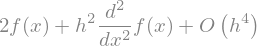

In [23]:
def vsota(n=3):
    return f(x+h).series(h, n=n).doit() + f(x-h).series(h, n=n).doit()
vsota(n=4)

Določimo drugi odvod:

In [24]:
f2_cent_točno = sym.solve(
           sym.Eq(f(x+h) + f(x-h), vsota(n=4)),   # 1 korak
           f(x).diff(x,2))[0]                     # 2.korak
f2_cent_O = f2_cent_točno.expand().getO()         # 3.korak
f2_cent_ocena = f2_cent_točno.expand().removeO()  # 4.korak

Ocena drugega odvoda je:

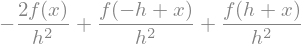

In [25]:
f2_cent_ocena

Ali:

$$y_i''=\frac{1}{h^2}\left(y_{i-1}-2\,y_{i}+y_{i+1}\right)$$

Uteži torej so:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-1}$ | $y_{i}$   |$y_{i+1}$ |
|:--------:|:-------------------:|:----------:|:----------:|
|$y_i''=\frac{1}{h^2}\cdot$ | 1 | -2 | 1 |


Napaka metode pa je ponovno drugega reda:

In [26]:
f2_cent_O

## Odvod $f'''(x)$

Če želimo določiti tretji odvod, moramo Taylorjevo vrsto razviti do stopnje 5:

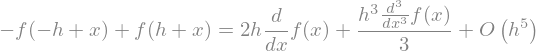

In [27]:
eq_h = sym.Eq(f(x+h)-f(x-h), razlika(n=5))
eq_h

Uporaba 1. odvoda, ki smo ga izpeljali zgoraj, nam ne bi koristila, saj je red napake $\mathcal{O}\left(h^{2}\right)$, kar pomeni, da bi v zgornji pri deljenju s $h^3$ dobili $\mathcal{O}\left(h^{-1}\right)$.

Uporabimo trik: ponovimo razvoj, vendar na podlagi dodatnih točk, ki sta od $x$ oddaljeni za $2h$ in $-2h$:

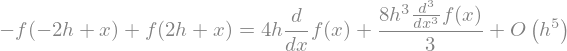

In [28]:
eq_2h = eq_h.subs(h, 2*h)
eq_2h

Sedaj imamo dve enačbi in dve neznanki; sistem bomo rešili po korakih:

1. enačbo `eq_h` rešimo za prvi odvod,
2. enačbo `eq_2h` rešimo za prvi odvod,
3. enačimo rezultata prvih dveh korakov in rešimo za tretji odvod,
4. določimo napako metode,
5. določimo oceno odvoda.

Izvedimo navedene korake:

In [29]:
f3_cent_točno = sym.solve(
        sym.Eq(sym.solve(eq_h, f(x).diff(x))[0],  # 1. korak
        sym.solve(eq_2h, f(x).diff(x))[0]),       # 2. korak
        f(x).diff(x,3))[0]                        # 3. korak
f3_cent_O = f3_cent_točno.expand().getO()         # 4.korak
f3_cent_ocena = f3_cent_točno.expand().removeO()  # 5.korak

Ocena 3. odvoda je:

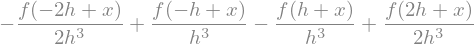

In [30]:
f3_cent_ocena

Ali:

$$y_i'''=\frac{1}{h^3}\left(-y_{i-2}/2+y_{i-1}-y_{i+1}+y_{i+2}/2\right)$$

Uteži torej so:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-2}$|$y_{i-1}$ | $y_{i}$   |$y_{i+1}$ |$y_{i+2}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'''=\frac{1}{h^3}\cdot$| -0.5 | 1 | 0 | -1 | 0.5|

Potrdimo, da je napaka metode drugega reda:

In [31]:
f3_cent_O

## Odvod $f^{(4)}(x)$

Ponovimo podoben postopek kot za 3. odvod, vendar za 4. odvod seštevamo Taylorjevo vrsto (do stopnje 6) naprej in nazaj:

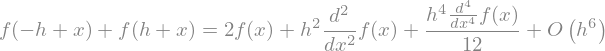

In [32]:
eq_h = sym.Eq(f(x+h)+f(x-h), vsota(n=6))
eq_h

Pripravimo dodatno enačbo na podlagi točk, ki sta od $x$ oddaljeni za $2h$ in $-2h$:

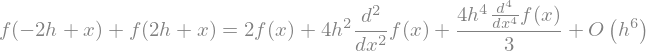

In [33]:
eq_2h = eq_h.subs(h, 2*h)
eq_2h

Iz dveh enačb določimo 4. odvod:

In [34]:
f4_cent_točno = sym.solve(
        sym.Eq(sym.solve(eq_h, f(x).diff(x,2))[0],  # 1. korak
        sym.solve(eq_2h, f(x).diff(x,2))[0]),       # 2. korak
        f(x).diff(x,4))[0]                          # 3. korak
f4_cent_O = f4_cent_točno.expand().getO()           # 4.korak
f4_cent_ocena = f4_cent_točno.expand().removeO()    # 5.korak

Ocena 4. odvoda je:

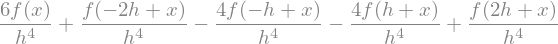

In [35]:
f4_cent_ocena

Ali:

$$y_i^{(4)}=\frac{1}{h^4}\left(y_{i-2}-4\,y_{i-1}+6\,y_i-4\,y_{i+1}+y_{i+2}\right)$$

Uteži torej so:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-2}$|$y_{i-1}$ | $y_{i}$   |$y_{i+1}$ |$y_{i+2}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 1 | -4 | 6 | -4 | 1|

Potrdimo, da je napaka metode drugega reda:

In [36]:
f4_cent_O

## Povzetek centralne diferenčne sheme*

Zgoraj smo izpeljali prve štiri odvode z napako metode 2. reda. Bistvo zgornjih izpeljav je, da nam dajo **uteži**, s katerimi moramo množiti funkcijske vrednosti, da izračunamo približek določenega odvoda. Iz tega razloga bomo tukaj te uteži zbrali. Če ste neučakani, lahko skočite na tabelo spodaj. Z branjem nadaljujte, če pa želite spoznati, kako predhodno izpeljane izraze strojno uredimo.

Najprej zberimo vse ocene odvodov v seznam:

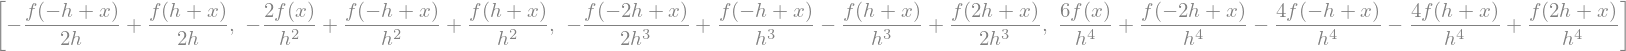

In [37]:
odvodi = [f1_cent_ocena, f2_cent_ocena, f3_cent_ocena, f4_cent_ocena]
odvodi

Na razpolago imamo 5 funkcijskih vrednosti (pri legah $x-2h, x-h, x, x+h, x+2h$), ki jih damo v seznam:

In [38]:
funkcijske_vrednosti = [f(x-2*h), f(x-h), f(x), f(x+h), f(x+2*h)]

Utež prvega odvoda za funkcijsko vrednosti $f(x-h)$ izračunamo:

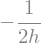

In [39]:
f1_cent_ocena.expand().coeff(funkcijske_vrednosti[1])

Sedaj posplošimo in izračunajmo uteži za vse funkcijske vrednosti in za vse ocene odvodov:

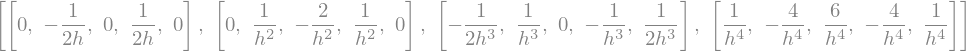

In [40]:
centralna_diff_shema = [[odvod.expand().coeff(fv) for fv in funkcijske_vrednosti] \
                        for odvod in odvodi]
centralna_diff_shema

Zgornje povzetke lahko tudi zapišemo v tabelarični obliki:

|    Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$   |$y_{i-2}$|$y_{i-1}$ | $y_{i}$   |$y_{i+1}$ |$y_{i+2}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{h}\cdot$| 0     | -0.5 | 0 | 0.5 | 0|
|$y_i''=\frac{1}{h^2}\cdot$| 0 | 1 | -2 | 1 | 0|
|$y_i'''=\frac{1}{h^3}\cdot$| -0.5 | 1 | 0 | -1 | 0.5|
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 1 | -4 | 6 | -4 | 1|

Prikazana centralna diferenčna shema ima napako 2. reda $\mathcal{O}(h^{2})$.

## Uporaba ``scipy.misc.central_diff_weight``

Uteži za centralno diferenčno metodo lahko izračunamo tudi z uporabo ``scipy.misc.central_diff_weight()`` ([dokumentacija](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html)):

```python
central_diff_weights(Np, ndiv=1)
```

`Np` predstavlja število točk, čez katere želimo izračunati odvod, `ndiv` pa stopnjo odvoda (privzeto 1).
Za več informacij glejte [dokumentacijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html).

Uvozimo funkcijo:

In [41]:
from scipy.misc import central_diff_weights

3$.$ odvod (čez pet točk), napaka reda  $\mathcal{O}(h^{2})$:

In [42]:
central_diff_weights(Np=5, ndiv=3)

array([-0.5,  1. ,  0. , -1. ,  0.5])

Opomba: ``SymPy.finite_diff_weights`` omogoča izračun uteži tudi pri nekonstantnem koraku; v podrobnosti ne bomo šli in radovednega bralca napotimo na [dokumentacijo](http://docs.sympy.org/latest/modules/calculus/index.html#sympy.calculus.finite_diff.finite_diff_weights).

## Izboljšan približek - Richardsonova ekstrapolacija

Če je točen odvod je izračunan kot:

$$f'(x_i)=f_o'(x_i)+e,$$

kjer je $f_o'(x_i)$ numerično izračunan odvod v točki $x_i$ in $e$ ocena napake.

Za metodo reda točnosti $n$: $\mathcal{O}(h^{n})$ pri koraku $h$ velja:
$$f'(x_i)=f_o'(x_i, h)+K\,h^n,$$
kjer je $K$ neznana konstanta. 

Če korak razpolovimo in predpostavimo, da se $K$ ne spremeni, velja:
$$f'(x_i)=f_o'\left(x_i, \frac{h}{2}\right)+K\,\left(\frac{h}{2}\right)^n.$$

Iz obeh enačb izločimo konstanto $K$ in določimo izboljšan približek:
$$\overline{f}'(x_i)=\frac{2^n\,f_o'\left(x_i, \frac{h}{2}\right)-f_o'(x_i, h)}{2^n-1}$$

### Zgled 

Poglejmo si zgled $f(x)=\sin(x)$ (analitični odvod je: $f'(x)=\cos(x)$):

In [43]:
x = np.linspace(0, 2*np.pi, 9)
y = np.sin(x)

Pri koraku $h$ imamo funkcijske vrednosti definirane pri:

In [44]:
x

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

Numerični odvod pri $x=\pi$:

In [45]:
x[4]

in koraku $h$ je

In [46]:
h = x[1] - x[0]
f_ocena_h = (-0.5*y[3] + 0.5*y[5])/h
f_ocena_h

Izračun pri koraku $2h$:

In [47]:
h2 = x[2] - x[0]
f_ocena_2h = (-0.5*y[2] + 0.5*y[6])/h2
f_ocena_2h

Izračunajmo izboljšano oceno za $x=\pi$:

In [48]:
f_ocena_izboljšana = (2**2 * f_ocena_h - f_ocena_2h)/(2**2-1)
f_ocena_izboljšana

Vidimo, da je izboljšana ocena najbližje teoretični vrednosti $\cos(\pi)=-1$.

# Necentralna diferenčna shema

Centralna diferenčna shema, ki smo jo spoznali zgoraj, je zelo uporabna in relativno natančna. Ker pa je ne moremo vedno uporabiti (recimo na začetku ali koncu tabele), si moramo pomagati z **necentralnimi diferenčnimi shemami** za računanje odvodov.

Poznamo:

* **diferenčno shemo naprej**, ki odvod točke aproksimira z vrednostmi funkcije v naslednjih  točkah in 
* **diferenčno shemo nazaj**, ki odvod točke aproksimira z vrednostmi v predhodnih točkah.

Izpeljave so podobne, kakor smo prikazali za centralno diferenčno shemo, zato jih tukaj ne bomo obravnavali in bomo prikazali samo končni rezultat.

## Diferenčna shema naprej

Diferenčna shema naprej z redom napake $\mathcal{O}(h^{1})$:

|  Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$        |$y_{i}$|$y_{i+1}$ | $y_{i+2}$   |$y_{i+3}$ |$y_{i+4}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{h}\cdot$| -1     | 1 | 0 | 0 | 0|
|$y_i''=\frac{1}{h^2}\cdot$| 1 | -2 | 1 | 0 | 0|
|$y_i'''=\frac{1}{h^3}\cdot$| -1 | 3 | -3| 1 | 0|
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema naprej z redom napake $\mathcal{O}(h^{2})$:

|  Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$        |$y_{i}$|$y_{i+1}$ | $y_{i+2}$   |$y_{i+3}$ |$y_{i+4}$|$y_{i+5}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{2h}\cdot$| -3 | 4 | -1| 0 | 0|  0| 
|$y_i''=\frac{1}{h^2}\cdot$| 2 | -5 | 4 | -1| 0| 0| 
|$y_i'''=\frac{1}{2h^3}\cdot$| -5 | 18| -24| 14| -3| 0| 
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 3 | -14 | 26 | -24 | 11| -2| 

## Diferenčna shema nazaj

Diferenčna shema nazaj z redom napake $\mathcal{O}(h^{1})$:

| Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$         |$y_{i-4}$|$y_{i-3}$ | $y_{i-2}$   |$y_{i-1}$ |$y_{i}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{h}\cdot$| 0 | 0| 0 | -1| 1|
|$y_i''=\frac{1}{h^2}\cdot$| 0 | 0 | 1 | -2| 1|
|$y_i'''=\frac{1}{h^3}\cdot$| 0 | -1| 3| -3| 1|
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| 1 | -4 | 6 | -4 | 1|

Diferenčna shema nazaj z redom napake $\mathcal{O}(h^{2})$:

| Odvod$\downarrow$ $\backslash$ Vrednosti $\rightarrow$         |$y_{i-5}$|$y_{i-4}$|$y_{i-3}$ | $y_{i-2}$   |$y_{i-1}$ |$y_{i}$|
|:--------:|:-------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|$y_i'=\frac{1}{2h}\cdot$| 0 | 0| 0| 1 |-4| 3| 
|$y_i''=\frac{1}{h^2}\cdot$| 0 | 0 | -1| 4|-5| 2| 
|$y_i'''=\frac{1}{2h^3}\cdot$| 0 | 3| -14| 24|-18| 5| 
|$y_i^{(4)}=\frac{1}{h^4}\cdot$| -2| 11| -24| 26 | -14| 3| 

# Uporaba ``numpy.gradient``

Za izračun numeričnih odvodov (centralna diferenčna shema 2. reda) lahko uporabimo tudi ``numpy.gradient()`` ([dokumentacija](http://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html)):

```python
gradient(f, *varargs, **kwargs)
```

kjer `f` predstavlja tabelo vrednosti (v obliki numeričnega polja) funkcije, katere odvod iščemo. `f` je lahko ene ali več dimenzij. Pozicijski parametri `varargs` definirajo razdaljo med vrednostmi argumenta funkcije `f`; privzeta vrednost je 1. Ta vrednost je lahko skalar, lahko pa tudi seznam vrednosti neodvisne spremenljivke (ali tudi kombinacija obojega). Gradientna metoda na robovih uporabi shemo naprej oziroma nazaj; parameter `edge_order` definira red sheme, ki se uporabi na robovih (izbiramo lahko med 1 ali 2, privzeta vrednost je 1). 

Rezultat funkcije `gradient` je numerični seznam (ali seznam numeričnih seznamov) z izračunanimi odvodi.

Za podrobnosti glejte [dokumentacijo](http://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html).

## Zgled

Pogledali si bomo zgled, kako uporabimo **uteži**, funkcijo gradient in posebnosti na robovih. Najprej pripravimo tabelo podatkov:

In [49]:
x, h = np.linspace(0, 1, 20, retstep=True)
y = np.sin(2*np.pi*x)

Uteži diferenčih shem:

In [50]:
centralna = np.array([-0.5, 0, 0.5]) # bi lahko tudi pridobili prek central_diff_weights(3,1)
naprej = np.array([-3/2, 2, -1/2])
nazaj = np.array([1/2, -2, 3/2])

Sedaj izvedemo odvod notranjih točk (prvi način je z izpeljevanjem seznamov, drugi je vektoriziran):

In [51]:
odvod_notranje = np.array([y[i-1:i+2] @ centralna/h for i in range(1, len(x)-1)]) # izpeljevanje seznamov
odvod_notranje = np.convolve(y, centralna[::-1], mode='valid') / h # vektoriziran

Na robovih uporabimo diferenčno shemo naprej oziroma nazaj:

In [52]:
odvod_prva = y[:len(naprej)] @ naprej / h  # naprej
odvod_zadnja = y[-len(nazaj):] @ nazaj / h # nazaj

Sestavimo rezultat:

In [53]:
odvod_cel = np.hstack([odvod_prva, odvod_notranje, odvod_zadnja])

Prikažemo rezultat skupaj z rezultatom funkcije `np.gradient`:

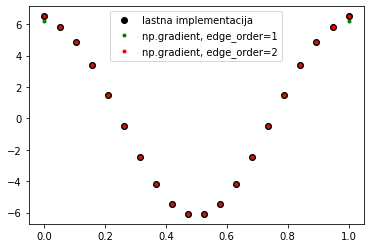

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, odvod_cel, 'ko', lw=3, label='lastna implementacija')
plt.plot(x, np.gradient(y, h), 'g.', label='np.gradient, edge_order=1')
plt.plot(x, np.gradient(y, h, edge_order=2), 'r.', label='np.gradient, edge_order=2')
plt.legend();

# Zaokrožitvena napaka pri numeričnem odvajanju

Zgoraj smo se osredotočili na napako metode. Pri numeričnem odvajanju pa moramo biti zelo pozorni tudi na **zaokrožitveno** (ali tudi *upodobitveno*) napako! Poglejmo si prvi odvod (po centralni diferenčni shemi) zapisan z napako metode ($k\,h^2$) in zaokrožitveno napako $\varepsilon$:

$$y_i'=\frac{1}{2h}\left((-y_{i-1}\pm\varepsilon)+(y_{i+1}\pm\varepsilon)\right) + k\,h^2$$

V najslabšem primeru se zaokrožitvena napaka sešteje in je skupna napaka:

$$n=\frac{\varepsilon}{h}+k\,h^2$$

Ko je $h$ velik prevladuje napaka metode $k\,h^2$; ko pa je $h$ majhen, pa prevladuje zaokrožitvena napaka. Napaka ima minimum, ko velja:

$$n'=-\frac{\varepsilon}{h^2}+2\,k\,h=0.$$

Sledi:

$$h=\sqrt[3]{\frac{\varepsilon}{2\,k}}.$$

## Zgled

Spodaj si bomo pogledali primer, kjer bomo natančnost spreminjali v treh korakih:

1. ``float16`` -
    16-bitni zapis: predznak 1 bit, 5 bitov eksponent, 10 bitov mantisa
2. ``float32`` -
    32-bitni zapis: predznak 1 bit, 8 bitov eksponent, 23 bitov mantisa
3. ``float64`` -
    64-bitni zapis: predznak 1 bit, 11 bitov eksponent, 52 bitov mantisa (to je privzeta natančnost).

Za več o tipih v ``numpy`` glejte [dokumentacijo](http://docs.scipy.org/doc/numpy/user/basics.types.html)

Določimo sedaj osnovno zaokrožitveno napako za posamezni tip:

In [55]:
eps16 = np.finfo(np.float16).eps
eps32 = np.finfo(np.float32).eps
eps64 = np.finfo(np.float64).eps
print(f'Osnovna zaokrožitvena napaka za tipe \
`float16`, `float32` in `float64` je:\n{[eps16, eps32, eps64]}')

Osnovna zaokrožitvena napaka za tipe `float16`, `float32` in `float64` je:
[0.000977, 1.1920929e-07, 2.220446049250313e-16]


Kot primer si poglejmo seštevanje: k številu `1.` prištejemo polovico osnovne zaokrožitvene napake `eps16` in pretvorimo v tip `float16`, ugotovimo, da je nova vrednost še vedno enaka vrednosti `1.`:

In [56]:
(1.+eps16/2).astype('float16')

1.0

Definirajmo najprej funkcijo $\exp(x)$, ki bo dala rezultat natančnosti, ki jo definira parameter `dtype`:

In [57]:
def fun(x, dtype=np.float): # funkcija
    return np.exp(-dtype(x)).astype(dtype)

Definirajmo še funkcijo za analitično določljiv odvod (to bomo pozneje potrebovali za določitev relativne napake):

In [58]:
def f1_fun(x): # "točen" odvod funkcije
    return -np.exp(-x)

Podobno kakor zgoraj pri seštevanju, lahko tudi pri vrednosti funkcije ugotovimo, da sprememba vrednosti $x$, ki je manjša od $\epsilon$, vodi v isti rezultat:

In [59]:
fun(1., dtype=np.float16)

0.368

In [60]:
fun(1+eps16/2, dtype=np.float16)

0.368

Uporabimo sedaj centralno diferenčno shemo za prvi odvod. Pri tem naj bodo števila zapisana z natančnostjo `dtype`, s pomočjo točnega odvoda pa se izračuna še relativna napaka:

In [61]:
def f1_CDS(fun, x, h, dtype=np.float64):
    f1_ocena = (fun(x+h, dtype=dtype)-fun(x-h,dtype=dtype))/(2*dtype(h))
    f1_točno = f1_fun(x)
    relativna_napaka = (f1_točno - f1_ocena) / f1_točno
    return f1_ocena, relativna_napaka

Poglejmo primer odvoda pri $x=1,0$ (Python funkcija vrne vrednost in relativno napako):

In [62]:
f1_CDS(fun, x=1., h=.01, dtype=np.float16)

In [63]:
f1_CDS(fun, x=1., h=.01, dtype=np.float64)

Definirajmo sedaj korak:

In [64]:
h=0.25**np.arange(30)
h[:10]

array([1.00000000e+00, 2.50000000e-01, 6.25000000e-02, 1.56250000e-02,
       3.90625000e-03, 9.76562500e-04, 2.44140625e-04, 6.10351562e-05,
       1.52587891e-05, 3.81469727e-06])

Izračunamo oceno odvodov za različne natančnosti zapisa (zaradi deljenja z 0 dobimo opozorilo):

In [65]:
f1_16 = f1_CDS(fun, x=1., h=h, dtype=np.float16)
f1_32 = f1_CDS(fun, x=1., h=h, dtype=np.float32)
f1_64 = f1_CDS(fun, x=1., h=h, dtype=np.float64)

<ipython-input-61-a9f3bf704e2c>:2: RuntimeWarning: invalid value encountered in true_divide
  f1_ocena = (fun(x+h, dtype=dtype)-fun(x-h,dtype=dtype))/(2*dtype(h))


Izrišemo različne tipe v odvisnosti od velikosti koraka $h$. Najprej uvozimo potrebne knjižnice:

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

Definirajmo sliko:

In [67]:
def fig_ocena():
    plt.semilogx(h, f1_16[0], 'b', lw=3, alpha=0.5, label='float16')
    plt.semilogx(h, f1_32[0], 'r', lw=3, alpha=0.5, label='float32')
    plt.semilogx(h, f1_64[0], 'g', lw=3, alpha=0.5, label='float64=float')
    plt.title('Ocena odvoda za različne tipe natančnosti')
    plt.xlabel('$h$')
    plt.ylabel('Ocena odvoda: $-\exp(-1)=−0.3678794$')
    plt.ylim(-0.37, -0.365)
    plt.legend();

Prikažimo jo:

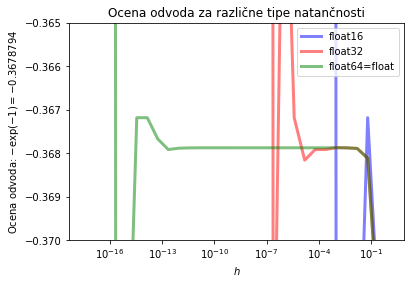

In [68]:
fig_ocena()

Pri relativno velikem koraku $h$ prevladuje napaka metode, pri majhnem koraku pa zaokrožitvnea napaka; optimalni korak lahko ocenimo glede na:

$$h=\sqrt[3]{\frac{\varepsilon}{2\,k}}.$$

V konkretnem primeru velja:

$$k=-\frac{f'''(x)}{6}=-\frac{-e^{-x}}{6}=\frac{1}{6\,e}\qquad(x=1)$$

Sledi:

$$h=\sqrt[3]{3\,\varepsilon\,e}.$$

Izračunamo primeren korak za 16, 32 in 64-bitni zapis:

In [69]:
np.power(3*eps16*np.exp(1),1/3)

In [70]:
np.power(3*eps32*np.exp(1),1/3)

In [71]:
np.power(3*eps64*np.exp(1),1/3)

Najbolje se izkaže 64-bitni zapis, vendar pa tudi pri tem korak manjši od cca `1e-5` ni priporočen!

# Nekaj vprašanj za razmislek!

1. Za batni mehanizem na spodnji sliki strojno izpeljite kinematiko gibanja bata, če se kolenasta gred giblje po zakonu $\varphi(t)=\omega\,t$.
<img src='./fig/batni_mehanizem.png' width=300>
2. Za kotno hitrosti $\omega=2\,\pi\,50\,$rad/s izrišite lego bata v treh obratih gredi. Uporabite: $r=0,03\,$m in $l=0,1\,$m.
3. Simbolno odvajajte lego $x(t)$, da pridobite pospešek $\ddot x(t)$.
4. Pripravite funkcijo za klicanje simbolnih izrazov za lego $x(t)$ in pospešek $\ddot x(t)$ iz ``numpy``.
5. S pomočjo ``scipy`` pripravite centralno diferenčno shemo za 2. odvod čez 3, 5, in 7 točk.
6. Raziščite funkcijo ``numpy.convolve`` in z njo na podlagi numeričnih vrednosti za $x$ numerično izračunajte pospešek $\ddot x$. Kje je odvod pravilen?
7. S centralno diferenčno shemo 2. odvoda čez tri točke ste izračunali notranje točke, nastavite diferenčno shemo naprej za izračun prve točke z natančnostjo $\mathcal{O}(h^{2})$.
8. Dodajte podatkom lege, določeno mero šuma in preverite, zakaj ni primerna uporaba numeričnega odvajanja na šumnih podatkih.
9. S centralno diferenčno shemo 2. odvoda čez tri točke ste doslej izračunali notranje točke, nastavite diferenčno shemo nazaj za izračun zadnje točke z natančnostjo $\mathcal{O}(h^{2})$.
10. Raziščite vpliv časovnega koraka na izračun 2. odvoda.
11. Izmerjene imamo sledeče pozicije (gibanja) avtomobila:

    $t = [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]$ [h]

    $s = [0, 3, 10, 13, 17, 25, 33, 46, 58, 75]$ [km]

    Izračunajte hitrost in pospešek avtomobila pri času 0,5 h. Hitrost in pospešek prikažite tudi v grafični obliki.
    
Opomba:
Dodatek k domačim nalogam: 6. vprašanje bi lahko nadaljevali in zašumljene podatke gladili ter nato izvedli odvajanje. Glajenje izvedite s konvolucijo med [0,21194156,  0,57611688,  0,21194156] in $x$.

# Dodatno

[Video predavanja na temo numeričnega odvajanja](https://www.youtube.com/watch?v=ZJkGI5DZQv8&list=PLYdroRCLMg5OvLx1EtY1ByvveJeTEXQd_&index=18).